<a href="https://colab.research.google.com/github/samsee/hgmldl2023/blob/main/hgmldl2023_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8장. 이미지를 위한 인공 신경망

## 합성곱 신경망의 구성 요소

In [ ]:
from tensorflow import keras

keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')

In [ ]:
keras.layers.MaxPool2D(2)

## 합성곱 신경망을 사용한 이미지 분류

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

### 데이터 불러오기

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# reshape -> Conv2D는 3차원 데이터(좌표 + 색상)를 기대함. 흑백 이미지는 2차원. 그래서 reshape.
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


### 모델

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

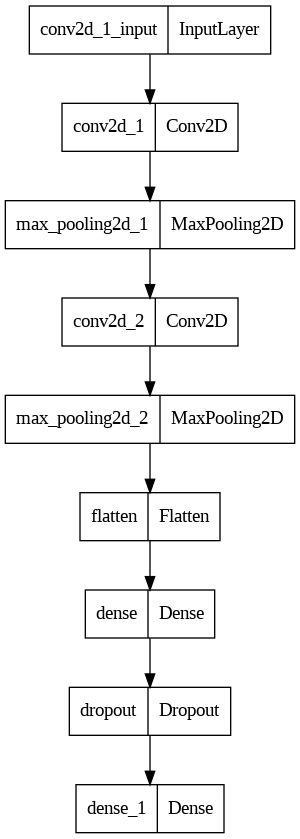

In [ ]:
keras.utils.plot_model(model)

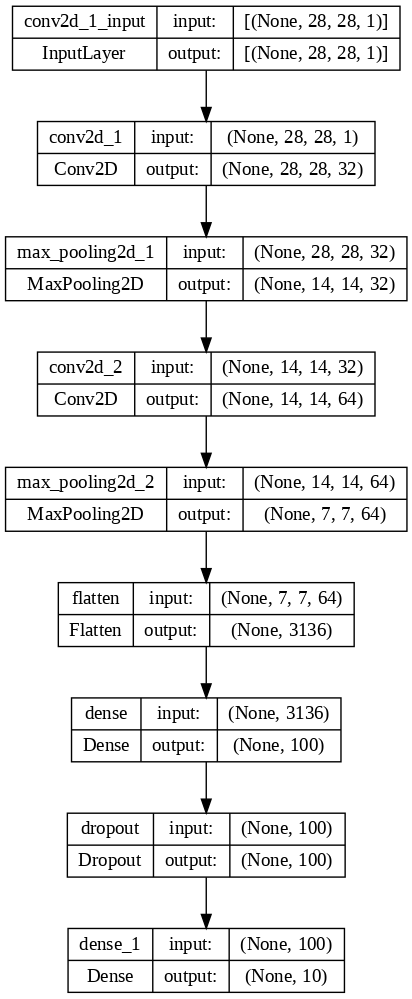

In [ ]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=100)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 20s 5ms/step - loss: 0.5062 - accuracy: 0.8188 - val_loss: 0.3097 - val_accuracy: 0.8852
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3351 - accuracy: 0.8797 - val_loss: 0.2796 - val_accuracy: 0.8953
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2900 - accuracy: 0.8957 - val_loss: 0.2465 - val_accuracy: 0.9077
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2547 - accuracy: 0.9071 - val_loss: 0.2316 - val_accuracy: 0.9132
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2328 - accuracy: 0.9133 - val_loss: 0.2251 - val_accuracy: 0.9181
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2119 - accuracy: 0.9224 - val_loss: 0.2170 - val_accuracy: 0.9226
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1955 - accuracy: 0.9276 - val_loss: 0.2157 - val_accuracy

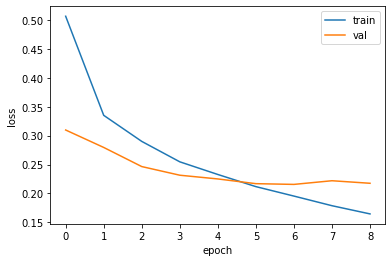

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2157 - accuracy: 0.9221


[0.2157202810049057, 0.92208331823349]

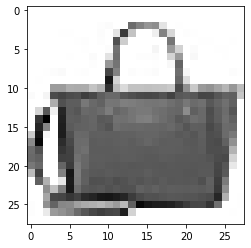

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 141ms/step
[[7.5558574e-16 2.7351212e-23 1.1266028e-20 1.9977543e-16 2.8580384e-17
  1.6671375e-12 4.9755573e-16 5.9750975e-17 1.0000000e+00 5.5114303e-17]]


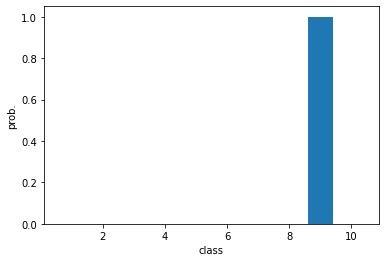

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2363 - accuracy: 0.9168


[0.23628701269626617, 0.9168000221252441]

In [ ]:
!cp best-cnn-model.h5 drive/MyDrive/'Colab Notebooks'
!cp *.png drive/MyDrive/'Colab Notebooks'

## 합성곱 신경망의 시각화

In [3]:
from tensorflow import keras

model = keras.models.load_model('drive/MyDrive/Colab Notebooks/best-cnn-model.h5')

In [5]:
model.layers

### 가중치 그려보기

* 첫 번째 Conv2D 레이어의 가중치 살펴보기
  * weights[0] = 가중치
  * weights[1] = 절편

In [6]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv.weights[0]

In [12]:
conv.weights[0].numpy().mean()

-0.02494116

In [13]:
conv.weights[0].numpy().std()

0.24951957

* 훈련 전 초기 상태의 가중치와는 차이가 꽤 난다.

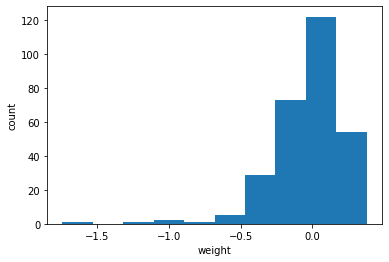

In [15]:
conv_weights = conv.weights[0].numpy()

import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

* 32개의 필터를 하나씩 히트맵으로 출력해보기

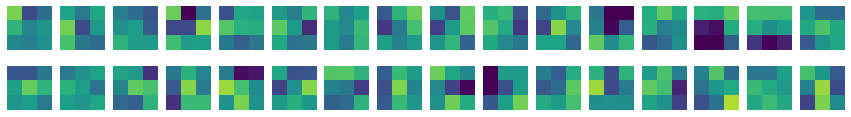

In [16]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [17]:
conv_weights[:,:,0,0]

array([[ 0.29859635, -0.2687774 , -0.13719529],
       [ 0.15061715, -0.03891503,  0.03049005],
       [-0.03368868, -0.07319875,  0.00471247]], dtype=float32)

* 초기 상태의 가중치

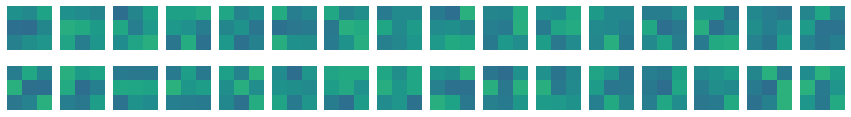

In [19]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))
no_training_conv = no_training_model.layers[0]
no_training_weights = no_training_conv.weights[0].numpy()

fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

### 특성 맵 그려보기

### 함수형 API

In [20]:
conv_acti = keras.Model(model.input, model.layers[0].output)

In [21]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


* 훈련 세트의 첫 번째 샘플의 특성 맵 그려보기

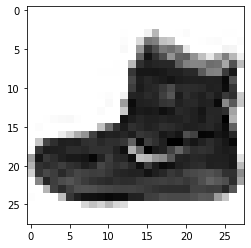

In [24]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [22]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 7s 7s/step


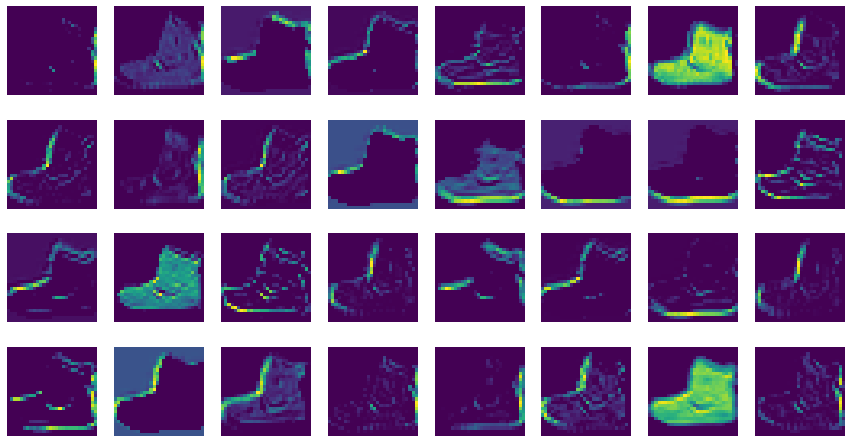

In [23]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

* 결론 : 각각의 필터가 샘플의 어떤 특성을 강조하고 있는지 볼 수 있다.

* 두 번째 conv2d 특성 맵 그려보기

1/1 [==============================] - 0s 214ms/step


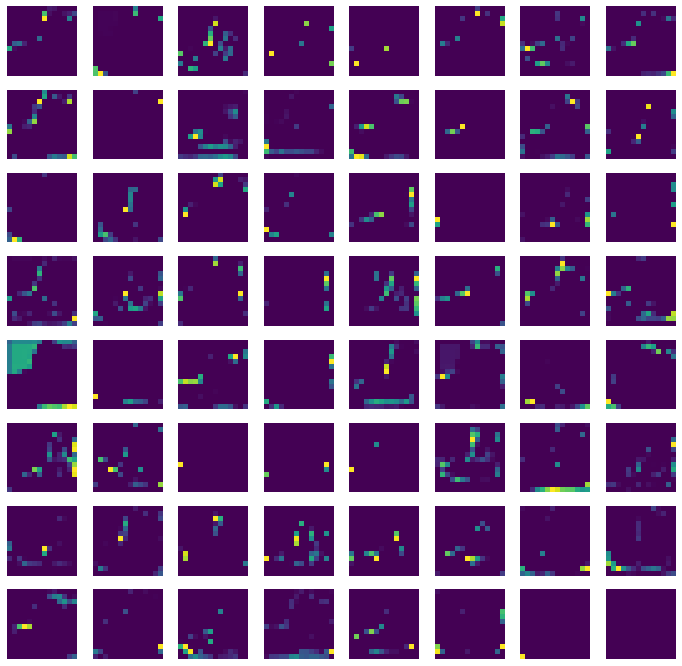

In [25]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

* 두 번째 합성곱 층의 가중치 시각화
  * 32개(깊이) x 64개(필터 수)? = 2048개?
  * 먼지 알 수 없는..무언가가 나옴. Warning 나와서 중단.

In [ ]:
conv2 = model.layers[2]
print(conv2.weights[0].shape, conv2.weights[1].shape)

conv2_weights = conv2.weights[0].numpy()

for k in range(64):
  fig, axs = plt.subplots(2, 16, figsize=(15,2))

  for i in range(2):
      for j in range(16):
          axs[i, j].imshow(conv2_weights[:,:,i*16 + j,k], vmin=-0.5, vmax=0.5)
          axs[i, j].axis('off')

plt.show()